In [1]:
import pandas as pd
from confpred.cp import run_cp
import numpy as np

/Users/margaridacampos/.pyenv/versions/entmaxcp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
run_cp("MNIST","entmax",0.1,23)

Loading predictions.


(np.float64(1.0), np.float64(0.9218))

In [4]:
summary_results = pd.DataFrame(columns=['dataset','score','seed','alpha','avg_size','coverage'])
for dataset in ['MNIST','CIFAR10','CIFAR100']:
    for loss in ['sparsemax','softmax','entmax']:
        for seed in ['23','05','19','95','42']:
            for alpha in np.linspace(0.01,0.1,5):
                print(dataset+'_'+loss+'_'+seed+'_'+str(alpha))
                avg_set_size, coverage = run_cp(dataset,loss,alpha,seed)
                summary_results.loc[len(summary_results)] = dataset, loss, seed,alpha, avg_set_size, coverage

Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predictions.
Loading predi

KeyboardInterrupt: 

In [ ]:
summary_results['score'] = summary_results['score'].map(lambda s: s.replace('entmax','1.5-entmax'))

In [ ]:
summary_results[50:]

,dataset,score,alpha,avg_size,coverage
50,CIFAR10,1.5-entmax,0.01,3.7181,0.9892
51,CIFAR10,1.5-entmax,0.02,2.3784,0.9758
52,CIFAR10,1.5-entmax,0.03,2.0022,0.9664
53,CIFAR10,1.5-entmax,0.04,1.7958,0.9587
54,CIFAR10,1.5-entmax,0.05,1.6201,0.9508
55,CIFAR10,1.5-entmax,0.06,1.4778,0.9404
56,CIFAR10,1.5-entmax,0.07,1.3774,0.9288
57,CIFAR10,1.5-entmax,0.08,1.3071,0.9181
58,CIFAR10,1.5-entmax,0.09,1.2430,0.9077
59,CIFAR10,1.5-entmax,0.10,1.1756,0.8941


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/q2/bjm3n1qd6jq1npksrk9n26nw0000gn/T/ipykernel_28514/2226018543.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='')
/var/folders/q2/bjm3n1qd6jq1npksrk9n26nw0000gn/T/ipykernel_28514/2226018543.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='')


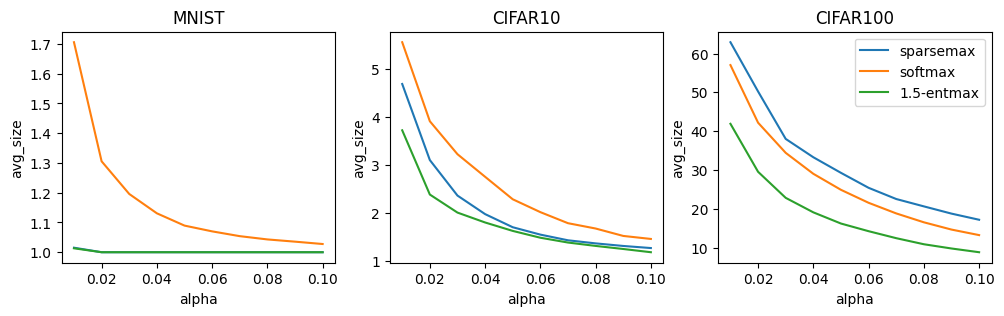

In [46]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
for index, var in enumerate(summary_results['dataset'].unique()):
    df = summary_results[summary_results['dataset']==var]
    if index == len(summary_results['dataset'].unique())-1:
        sns.lineplot(df, x = 'alpha', hue = 'score',y='avg_size', ax = axs[index])
    else: 
        sns.lineplot(df, x = 'alpha', hue = 'score',y='avg_size', ax = axs[index], legend = False)    
    axs[index].set_title(var)
    axs[index].set_ylim
    plt.legend(title='')

/var/folders/q2/bjm3n1qd6jq1npksrk9n26nw0000gn/T/ipykernel_28514/3375878865.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='')
/var/folders/q2/bjm3n1qd6jq1npksrk9n26nw0000gn/T/ipykernel_28514/3375878865.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='')


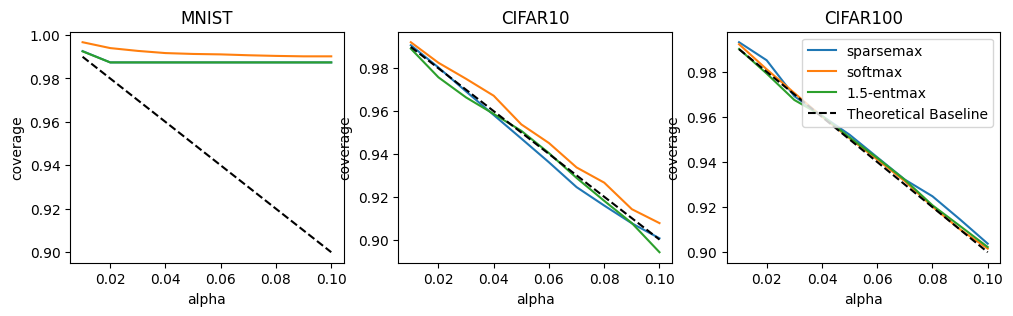

In [47]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
for index, var in enumerate(summary_results['dataset'].unique()):
    df = summary_results[summary_results['dataset']==var]
    if index == len(summary_results['dataset'].unique())-1:
        sns.lineplot(df, x = 'alpha', hue = 'score',y='coverage', ax = axs[index])
    else: 
        sns.lineplot(df, x = 'alpha', hue = 'score',y='coverage', ax = axs[index], legend = False)
    axs[index].set_title(var)
    axs[index].plot([0.01,0.1],[0.99,0.9], label = 'Theoretical Baseline', c='black', linestyle = 'dashed')
    plt.legend(title='')

In [12]:
from confpred.datasets import CIFAR10, CIFAR100, MNIST
import os
import pickle
from sklearn.metrics import accuracy_score

In [35]:
dataset_list = ['MNIST','CIFAR10','CIFAR100']
loss_list = ['softmax','sparsemax','entmax']
transformation = 'logits'
dataset = dataset_list[0]
loss = loss_list[0]
acc_df = pd.DataFrame({'dataset':dataset_list}).merge(pd.DataFrame({'loss':loss_list}), how = 'cross')
acc_df['cal_size'] = np.nan
acc_df['cal_acc'] = np.nan
acc_df['test_size'] = np.nan
acc_df['test_size'] = np.nan

for index, row in acc_df.iterrows():
    dataset = row['dataset']
    loss = row['loss'] 
    path = f'../entmax_cp/predictions/{dataset}_test_{loss}_{transformation}_proba.pickle'
    with open(path, 'rb') as f:
        test_proba = pickle.load(f)
    path = f'../entmax_cp/predictions/{dataset}_test_true.pickle'
    with open(path, 'rb') as f:
        test_true_enc = pickle.load(f)
    path = f'../entmax_cp/predictions/{dataset}_cal_{loss}_{transformation}_proba.pickle'
    with open(path, 'rb') as f:
        cal_proba = pickle.load(f)
    path = f'../entmax_cp/predictions/{dataset}_cal_true.pickle'
    with open(path, 'rb') as f:
        cal_true_enc = pickle.load(f)
    acc_df.at[index,'cal_acc'] = accuracy_score(cal_true_enc.argmax(axis = 1),cal_proba.argmax(axis = 1))
    acc_df.at[index,'test_acc'] = accuracy_score(test_true_enc.argmax(axis = 1),test_proba.argmax(axis = 1))
    acc_df.at[index,'cal_size'] = cal_true_enc.shape[0]
    acc_df.at[index,'test_size'] = test_true_enc.shape[0]

In [36]:
acc_df

,dataset,loss,cal_size,cal_acc,test_size,test_acc
0,MNIST,softmax,3000.0,0.987000,10000.0,0.9892
1,MNIST,sparsemax,3000.0,0.985333,10000.0,0.9874
2,MNIST,entmax,3000.0,0.985333,10000.0,0.9874
3,CIFAR10,softmax,3000.0,0.842667,10000.0,0.8366
4,CIFAR10,sparsemax,3000.0,0.837667,10000.0,0.8321
5,CIFAR10,entmax,3000.0,0.850000,10000.0,0.8503
6,CIFAR100,softmax,3000.0,0.576000,10000.0,0.5783
7,CIFAR100,sparsemax,3000.0,0.379667,10000.0,0.3878
8,CIFAR100,entmax,3000.0,0.557667,10000.0,0.5490


In [37]:
from confpred.datasets import CIFAR10, MNIST, CIFAR100
data = CIFAR10(0.2, 8, 3000, True)
len(data.train)

Files already downloaded and verified
Files already downloaded and verified


4700

In [38]:
data = CIFAR100(0.2, 8, 3000, True)
len(data.train)

Files already downloaded and verified
Files already downloaded and verified


4700

In [39]:
data = MNIST(0.2, 8, 3000, True)
len(data.train)

5700